#Importing and Cleaning
My first priority with this data set is to clean the data. To do this I want to check the data, to figure out where the data begins.

In [3]:
import pandas as pd

#Importing Raw Data
df = pd.read_csv('AID_623877_datatable.csv', skiprows= 4)

print(df.head)
print(df.shape)

<bound method NDFrame.head of         RESULT_ATTR_CONC_MICROMOL  Unnamed: 1  Unnamed: 2  \
0                               1  49823064.0  17581598.0   
1                               2   4259955.0   2964268.0   
2                               3  49734976.0   7087109.0   
3                               4  49824916.0  17581383.0   
4                               5  17415017.0   5739418.0   
...                           ...         ...         ...   
262349                     262350  24790713.0   1363391.0   
262350                     262351  24783143.0   4918874.0   
262351                     262352  24786903.0   3193377.0   
262352                     262353  24782475.0   1243282.0   
262353                       2623         NaN         NaN   

                                               Unnamed: 3 Unnamed: 4  \
0       COC1=C(C=C(C=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)...     Active   
1                          CCC1(CC2=CC=CC=C2C(=C1C#N)N)CC     Active   
2       CC1=C(C2=CC=C

Next, I am turning the active vs inactive classifications into numbers for future analysis.

In [4]:
#Specifying the column and values to give them values.
df.iloc[:, 4] = df.iloc[:, 4].map({'Active': 1, 'Inactive': 0})

print(df.head)

<bound method NDFrame.head of         RESULT_ATTR_CONC_MICROMOL  Unnamed: 1  Unnamed: 2  \
0                               1  49823064.0  17581598.0   
1                               2   4259955.0   2964268.0   
2                               3  49734976.0   7087109.0   
3                               4  49824916.0  17581383.0   
4                               5  17415017.0   5739418.0   
...                           ...         ...         ...   
262349                     262350  24790713.0   1363391.0   
262350                     262351  24783143.0   4918874.0   
262351                     262352  24786903.0   3193377.0   
262352                     262353  24782475.0   1243282.0   
262353                       2623         NaN         NaN   

                                               Unnamed: 3 Unnamed: 4  \
0       COC1=C(C=C(C=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)...        1.0   
1                          CCC1(CC2=CC=CC=C2C(=C1C#N)N)CC        1.0   
2       CC1=C(C2=CC=C

Here is the bulk of my data cleaning. Here I am removing columns I don't need in the data analysis portion. I'm also removing all the NA values to streamline the data analysis process.

In [5]:
df_clean = df.drop(df.columns[6], axis=1)  # Removes column containing the jhicc links
df_clean = df_clean.dropna(axis=1, how='all')  # Removes columns where all values are NaN
df_clean = df_clean.dropna(axis=0, how='all')  # Removes rows where all values are NaN
df_clean = df_clean.fillna(0)  # Fills NaN values with 0
df_clean = df_clean.drop_duplicates()  # Removes duplicate rows

print(df_clean.head)
print(df_clean.shape)

<ipython-input-5-beaca090fcd4>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(0)  # Fills NaN values with 0


<bound method NDFrame.head of         RESULT_ATTR_CONC_MICROMOL  Unnamed: 1  Unnamed: 2  \
0                               1  49823064.0  17581598.0   
1                               2   4259955.0   2964268.0   
2                               3  49734976.0   7087109.0   
3                               4  49824916.0  17581383.0   
4                               5  17415017.0   5739418.0   
...                           ...         ...         ...   
262349                     262350  24790713.0   1363391.0   
262350                     262351  24783143.0   4918874.0   
262351                     262352  24786903.0   3193377.0   
262352                     262353  24782475.0   1243282.0   
262353                       2623         0.0         0.0   

                                               Unnamed: 3  Unnamed: 4  \
0       COC1=C(C=C(C=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)...         1.0   
1                          CCC1(CC2=CC=CC=C2C(=C1C#N)N)CC         1.0   
2       CC1=C(C2=C

Lastly, I give new names to the columns. This makes it so that I can easily analyze the data and only include the necessary information in the data frame for smoother data analysis.

In [6]:
# Add back column names
df_clean.columns = ['ID', 'SID', 'CID', 'SMILES', 'Activity', 'Activity Score', 'Ratio B Score']  # Replace with actual names

print(df_clean.head)
print(df_clean.shape)

<bound method NDFrame.head of             ID         SID         CID  \
0            1  49823064.0  17581598.0   
1            2   4259955.0   2964268.0   
2            3  49734976.0   7087109.0   
3            4  49824916.0  17581383.0   
4            5  17415017.0   5739418.0   
...        ...         ...         ...   
262349  262350  24790713.0   1363391.0   
262350  262351  24783143.0   4918874.0   
262351  262352  24786903.0   3193377.0   
262352  262353  24782475.0   1243282.0   
262353    2623         0.0         0.0   

                                                   SMILES  Activity  \
0       COC1=C(C=C(C=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)...       1.0   
1                          CCC1(CC2=CC=CC=C2C(=C1C#N)N)CC       1.0   
2       CC1=C(C2=CC=CC=C2N1)C(=O)C(=O)N3CCN(CC3)C4=CC(...       1.0   
3       COC1=CC=CC(=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)N...       1.0   
4        C/C(=C\C(=O)C1=CC=C(C=C1)F)/NCC2=CC3=C(C=C2)OCO3       1.0   
...                                    

Now that I've cleaned up the data to my liking I'm going to double check that these samples are already normalized. The authors state that the samples are normalized to negative control samples and any compound with less than -3 standard deviations in B-score are classified as activators. Based on this the samples should be adequately normalized and ready for statistical analysis. However, before I start I want to confirm their statements by confirming their negative controls are properly normalized and the distribution of B-scores.

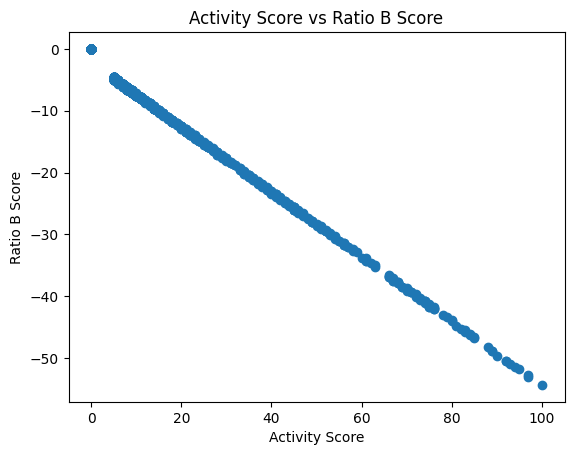

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create Scatter Plot to visualize correlation
plt.scatter(df_clean['Activity Score'], df_clean['Ratio B Score'])
plt.xlabel('Activity Score')
plt.ylabel('Ratio B Score')
plt.title('Activity Score vs Ratio B Score')
plt.show()

This graph is showing that the activity score and ratio B score are negatively correlated. This make sense as the active compounds are classified by a b score that is less than 3 standard deviations from the b score.

In [9]:
from scipy.stats import pearsonr

#Find Pearson correlation value to confirm scatter plot.
correlation, p_value = pearsonr(df_clean['Activity Score'], df_clean['Ratio B Score'])
print(f"Pearson correlation: {correlation}, p-value: {p_value}")

Pearson correlation: -0.995613712821196, p-value: 0.0


The Pearson correlation is showing that the samples are almost perfectly negatively correlated which makes sense based on the graph. I next wanted to look at the distribution of B-scores in a histogram to make sure that they are negatively distributed.

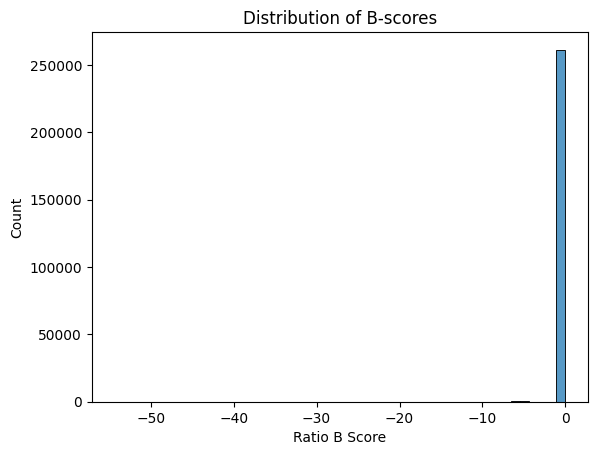

In [10]:
#Creating histogram to view the ditribution of B-scores
sns.histplot(df_clean['Ratio B Score'], bins=50)
plt.title('Distribution of B-scores')
plt.show()

The histogram is dominated by B-scores of 0. This represents compounds that are inactive and due to this I will remove them in order to look at the distribution of B scores of the active compounds.

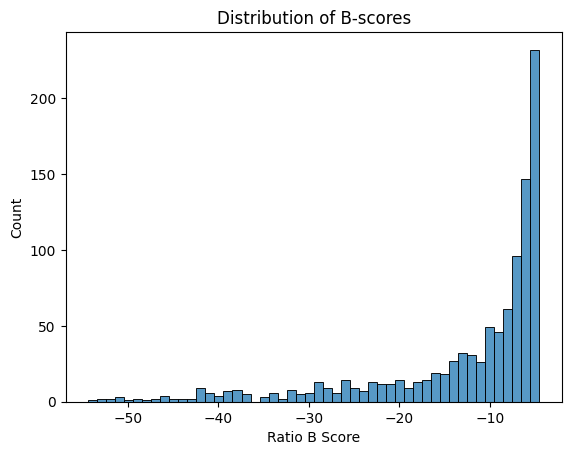

In [11]:
#Redoing histogram with only active compounds
df_active = df_clean[df_clean['Ratio B Score'] != 0]  # Remove rows where B-score is exactly 0
sns.histplot(df_active['Ratio B Score'], bins=50)
plt.title('Distribution of B-scores')
plt.show()

Although the distribution doesn't look normal this can be explained by their B-score criteria. The cutoff for inactive compounds is a B-score of 0. So this would most likely be normally distributed, but the cutoff makes it look like the scores are skewed. However, this is due to the criteria of active vs inactive compounds and helps with identifying hits.

Next, I want to confirm their negative controls, but they did not list which compounds where used as the negative controls or positive controls so we will trust them in their analysis.

The next thing I wanted to confirm was the way they identified their hits. In their paper they state that hits were classified by standard deviations of -3 * sd of the ratio b scores. Bellow I test that and compare the hits I get with theirs.

In [ ]:
#Identifying Hits by giving them a threshold based on the sd of their Ratio B Score
std_dev = df_active['Ratio B Score'].std()
threshold = -3 * std_dev
active_compounds = df_active[df_active['Ratio B Score'] < threshold]
print(std_dev)
print(f"Number of active compounds: {len(active_compounds)}")
print(df_active.shape)


10.495293024873178
Number of active compounds: 82
(1022, 7)


My analysis indicates 82 active compounds, however in the filtered data set there are 1022 active compounds so what is the problem? When looking back at their data they define an active compound as any compound with an activity score >0. This means that my threshold for active compounds is too stringent and is designated for the highest activity compounds. To show this I can group the compounds together to show how many are both hits and active vs only active and not a hit.

In [ ]:
#Grouping compounds as active and as hits
df_active['is_active'] = df_active['Activity Score'] > 0  # Dataset definition of active compounds
df_active['is_hit'] = df_active['Ratio B Score'] < (- 3 * df_active['Ratio B Score'].std())  # Strong hit definition

# Count how many compounds fall into each category
print(df_active.groupby(['is_active', 'is_hit']).size())


is_active  is_hit
True       False     940
           True       82
dtype: int64


<ipython-input-28-53ee8d3ed993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['is_active'] = df_active['Activity Score'] > 0  # Dataset definition of active compounds
<ipython-input-28-53ee8d3ed993>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['is_hit'] = df_active['Ratio B Score'] < (- 3 * df_active['Ratio B Score'].std())  # Strong hit definition


I now have identified 82 hits and the next step is to analyze the hits to determine which would be best for the goal of their screen. "The purpose of this assay is to identify test compounds that activate/potentiate the calcium-activated chloride channel (TMEM16A)."
Now that I have the hits based on their parameters I can look and see how they are distributed with an ROC curve. The ROC curve shows us the true positive rate vs the false positive rate. With an auc of 1 it indicates that all of our hits are correctly identified as positive hits.

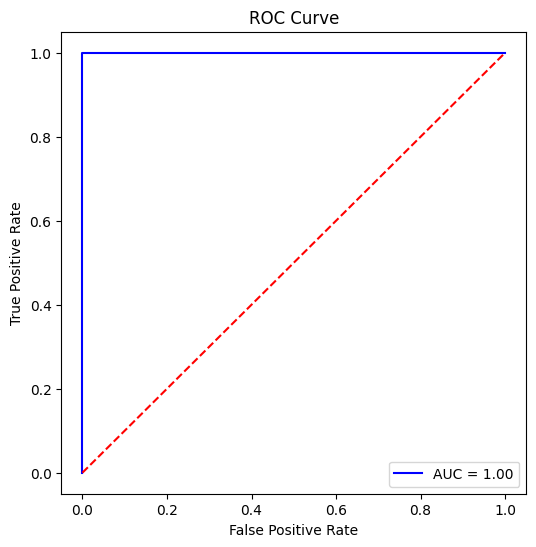

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(df_clean['Activity'], df_clean['Activity Score'])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
#Creating a new column for hit_status
df_active['hit_status'] = (df_active['Ratio B Score'] < (- 3 * df_active['Ratio B Score'].std()) ).astype(int)

print(df_active.head)

<bound method NDFrame.head of         ID       SID       CID  \
0        1  49823064  17581598   
1        2   4259955   2964268   
2        3  49734976   7087109   
3        4  49824916  17581383   
4        5  17415017   5739418   
...    ...       ...       ...   
1017  1018  14745581   2088460   
1018  1019  24829102   3690465   
1019  1020  85273478    647800   
1020  1021   7969128   5309788   
1021  1022  49824354   1791199   

                                                 SMILES  Activity  \
0     COC1=C(C=C(C=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)...         1   
1                        CCC1(CC2=CC=CC=C2C(=C1C#N)N)CC         1   
2     CC1=C(C2=CC=CC=C2N1)C(=O)C(=O)N3CCN(CC3)C4=CC(...         1   
3     COC1=CC=CC(=C1)NC(=O)CN2C3=CC=CC=C3C4=C2C(=O)N...         1   
4      C/C(=C\C(=O)C1=CC=C(C=C1)F)/NCC2=CC3=C(C=C2)OCO3         1   
...                                                 ...       ...   
1017              CC1=CC(=NC2=NC(=NN12)C(=O)NC(C)(C)C)C         1   
1018  CC1

<ipython-input-16-5af50196a54d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['hit_status'] = (df_active['Ratio B Score'] < (- 3 * df_active['Ratio B Score'].std()) ).astype(int)


#Plotting Hits
The final portion of this project is just plotting all of the hits that I found through my data analysis. To show their distribution I'm using both volcano plots and scatter plots. Hits are in red and non-hits in blue.

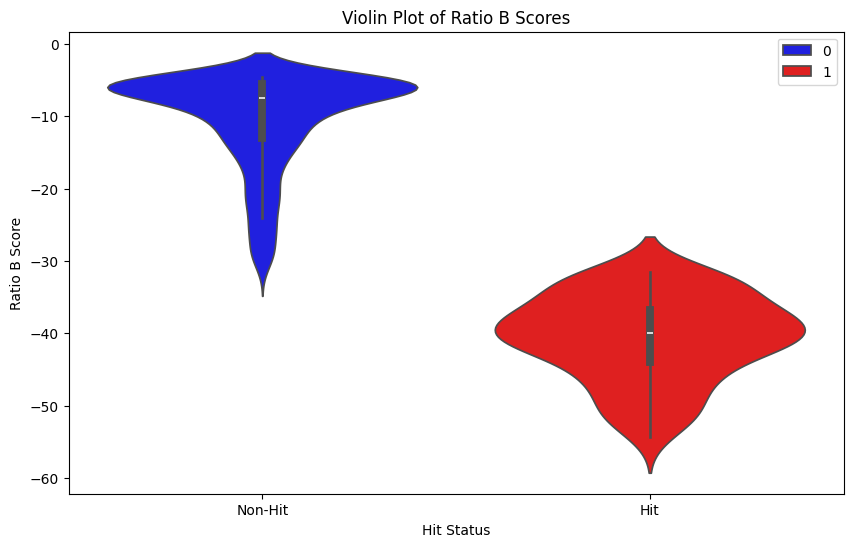

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_active, x='hit_status', y='Ratio B Score', hue='hit_status', palette={0: 'blue', 1: 'red'})
plt.xlabel('Hit Status')
plt.ylabel('Ratio B Score')
plt.title('Violin Plot of Ratio B Scores')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.legend()
plt.show()

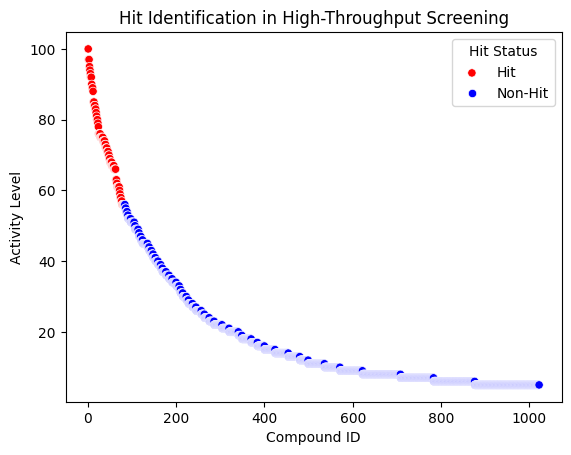

In [ ]:
sns.scatterplot(data=df_active, x='ID', y='Activity Score', hue='hit_status', palette={0: 'blue', 1: 'red'})

# Customize the plot
plt.xlabel('Compound ID')
plt.ylabel('Activity Level')
plt.title('Hit Identification in High-Throughput Screening')
plt.legend(title='Hit Status', labels=['Hit', 'Non-Hit'])
plt.show()

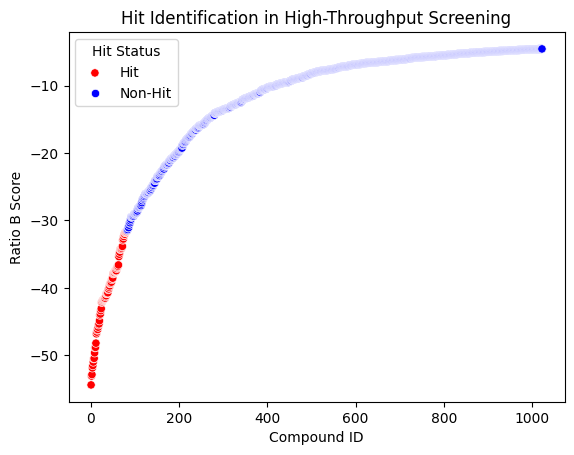

In [ ]:
sns.scatterplot(data=df_active, x='ID', y='Ratio B Score', hue='hit_status', palette={0: 'blue', 1: 'red'})

# Customize the plot
plt.xlabel('Compound ID')
plt.ylabel('Ratio B Score')
plt.title('Hit Identification in High-Throughput Screening')
plt.legend(title='Hit Status', labels=['Hit', 'Non-Hit'])
plt.show()

Lastly, I wanted a list of the top 10 hits that could be used in future testing and experiments to confirm their activation of calcium associated chloride channels.

In [12]:
df_top_hits = df_active.sort_values(by="Ratio B Score", ascending=False)

# Select the top 10 hits
top_10_hits = df_top_hits.head(10)

# Display the results
print(top_10_hits)

        ID         SID        CID  \
1021  1022  49824354.0  1791199.0   
1020  1021   7969128.0  5309788.0   
1019  1020  85273478.0   647800.0   
1018  1019  24829102.0  3690465.0   
1017  1018  14745581.0  2088460.0   
1016  1017  24805807.0  2210086.0   
1015  1016  24822971.0  1909759.0   
1014  1015  24816168.0  4452965.0   
1013  1014  24801033.0   785525.0   
1012  1013    851706.0   654299.0   

                                                 SMILES  Activity  \
1021  CC1=C(C=CC(=C1)OCC(=O)NNC(=S)NC(=O)C2=CC=C(O2)...       1.0   
1020  CC1=CC(=C(C=C1)C)CN2C(=C(N=N2)C(=O)NC3=CC(=CC(...       1.0   
1019   CCSC1=NC2=C(N1CC(COC3=CC=CC=C3C)O)C(=O)NC(=O)N2C       1.0   
1018  CC1=C(C=C(C=C1)C2=NC3=C(N2CC(C)C)C(=O)NC(=O)N3...       1.0   
1017              CC1=CC(=NC2=NC(=NN12)C(=O)NC(C)(C)C)C       1.0   
1016   CC1=C(C=CC(=C1)OC)NC(=S)NC2=CC=C(C=C2)S(=O)(=O)N       1.0   
1015   CC1=CC=C(C=C1)N2C(=O)/C(=C/C3=COC=C3)/C(=O)NC2=O       1.0   
1014  C1CN(C(C2=CC=CN21)C3=CC=CC=C3F)C(=